In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.options.display.max_columns = None

In [3]:
df_subterraneas = pd.read_csv('Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv',
                                encoding= 'latin1')
df_superficiales = pd.read_csv('Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv',
                                encoding= 'latin1')
escala_subterranea = pd.read_csv('Datos_de_calidad_del_agua_2020/Escalas_subterranea.csv',
                                encoding= 'latin1')
escala_superficial = pd.read_csv('Datos_de_calidad_del_agua_2020/Escalas_superficial.csv',
                                encoding= 'latin1')

## Limpieza por DataFrame
Veremos uno por uno como es que están los dataframes para poder dejar la información limpia para poder tener los datos limpios y clasificados.

### Aguas subterraneas

In [4]:
df_subterraneas

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,NaN,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.732,Potable - Dura,<1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,NaN,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,<1.1,Potable - Excelente,5.75011,Potable - Buena calidad,0.0134,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,NaN,342,Excelente para riego,Potable - Dulce,1.8045,Alta,120.719,Potable - Dura,<1.1,Potable - Excelente,1.449803,Potable - Excelente,0.037,No apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"FLUO,AS,",SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,NaN,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.879,Potable - Dura,<1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,<0.003,Potable - Excelente,0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,NaN,1179,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291,Aceptable,15.672251,No apta como FAAP,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"NO3,",SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,OCRBR5101M1,L-310 (COMUNIDAD SAN MANUEL),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.54191,24.76036,2020,231.045,Alta,2350.0,Dudosa para riego,NaN,1545.8,Cultivos con manejo especial,Ligeramente salobres,<0.2,Baja,752.096,Muy dura e indeseable usos industrial y domesti

In [5]:
df_subterraneas.describe(include= 'all')

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
count,1068,1068,1068,1068,1068,1068,1068,1068.000000,1068.000000,1068.0,1064.000000,1064,1062.000000,1062,0.0,1066,1066,1066,1068,1068,1067,1067,1068,1068,1067,1067,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,634,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068
unique,1068,1066,13,32,452,273,8,NaN,NaN,NaN,NaN,4,NaN,5,NaN,925,5,4,862,4,889,4,125,5,995,3,209,3,3,2,168,2,61,2,31,2,362,3,615,2,3,126,3,3,3,3,2,3,2,3,2,2,2,2,2,2,2
top,DLAGU6,EL FUERTE,CUENCAS CENTRALES DEL NORTE,DURANGO,LA PAZ,PENINSULA DE YUCATAN,POZO,NaN,NaN,NaN,NaN,Alta,NaN,Permisible para riego,NaN,496,Excelente para riego,Potable - Dulce,<0.2,Baja,<20,Potable - Dura,<1.1,Potable - Excelente,<0.02,Potable - Excelente,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,"FLUO,",SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
freq,1,2,232,121,27,119,1039,NaN,NaN,NaN,NaN,794,NaN,460,NaN,4,491,834,162,434,26,577,737,739,65,788,815,816,1066,1066,854,1053,968,1067,1038,1056,545,982,401,932,434,78,1005,939,995,995,876,841,1007,985,941,1066,1053,1067,1056,982,932
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-101.891007,23.163618,2020.0,235.633759,NaN,1138.953013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.703263,3.887670,0.0,116.874291,NaN,1245.563674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-116.664250,14.561150,2020.0,26.640000,NaN,50.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-105.388865,20.212055,2020.0,164.000000,NaN,501.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-102.174180,22.617190,2020.0,215.527500,NaN,815.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-98.974716,25.510285,2020.0,292.710000,NaN,1322.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_subterraneas.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L',
       'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_mg/L',
       'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L',
       'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL',
       'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L',
       'CALIDAD_AS', 'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR',
       'HG_TOT_mg/L', 'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L',
       'CALIDAD_MN', 'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES',
       'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype='

In [7]:
subterraneas_col_id = ['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
                        'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO']

subterraneas_col_calidad = [x for x in df_subterraneas.columns if x[0:7] == 'CALIDAD'] + ['SEMAFORO', 'CONTAMINANTES']

subterraneas_col_medicion = [x for x in df_subterraneas.columns if x[-1] == 'L']

subterraneas_col_cumplimiento = [x for x in df_subterraneas.columns if x[0:7] == 'CUMPLE_']

Porcentaje de nulos por cada columna

In [8]:
pd.DataFrame(df_subterraneas.isna().sum() /len(df_subterraneas)).sort_values(by= 0, ascending= False)

,0
SDT_mg/L,1.000000
CONTAMINANTES,0.406367
CALIDAD_CONDUC,0.005618
CONDUCT_mS/cm,0.005618
ALC_mg/L,0.003745
CALIDAD_ALC,0.003745
CALIDAD_SDT_ra,0.001873
SDT_M_mg/L,0.001873
CALIDAD_SDT_salin,0.001873
CALIDAD_N_NO3,0.000936


Podemos ver que la variable de SDT_mg/L está en su totalidad siendo NaN por lo que la eliminaremos y veremos si es que es suficiente con imputar los valores de las demás variables en nulo ya que tenemos una con hasta 50% de nulos. Veremos que tanto aporta al dataframe y después decidiremos si es que es necesario quedarnosla.

In [9]:
df_subterraneas.drop('SDT_mg/L', axis= 1, inplace=True)

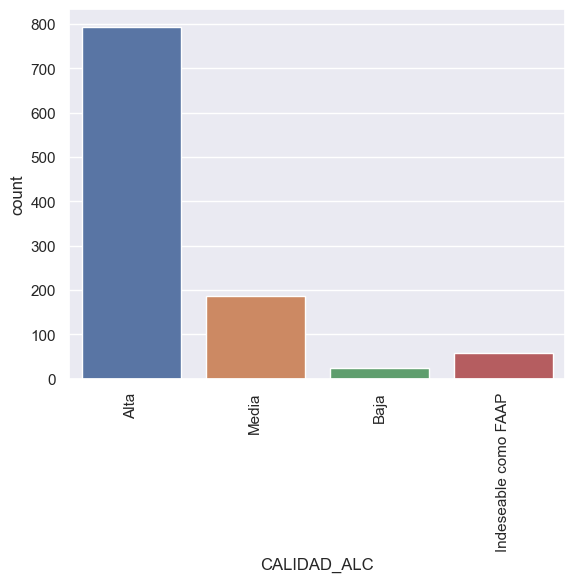

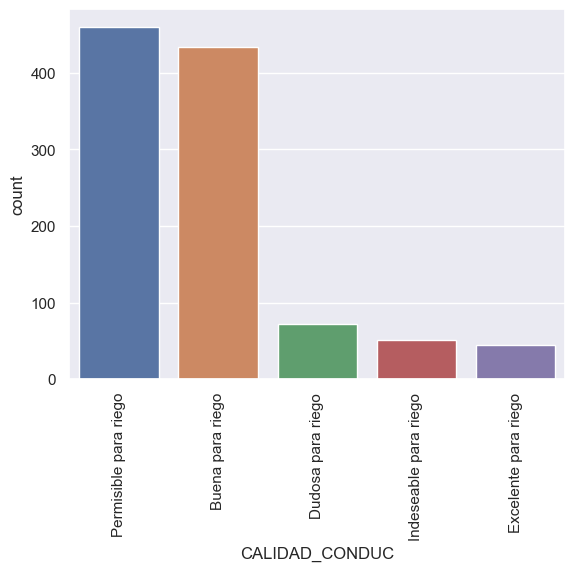

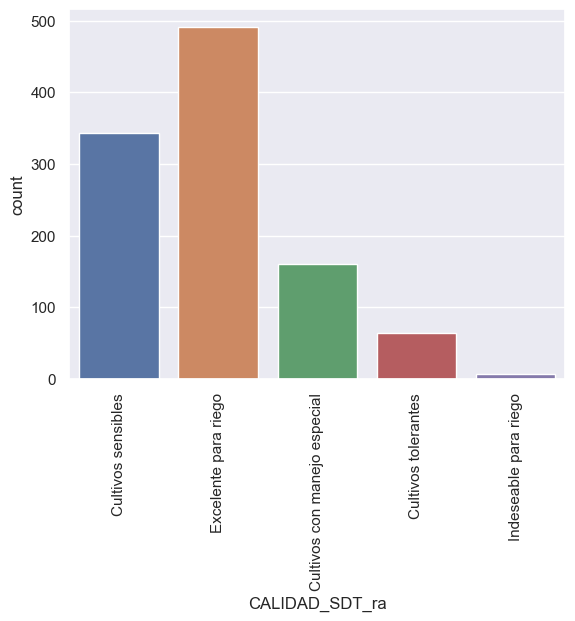

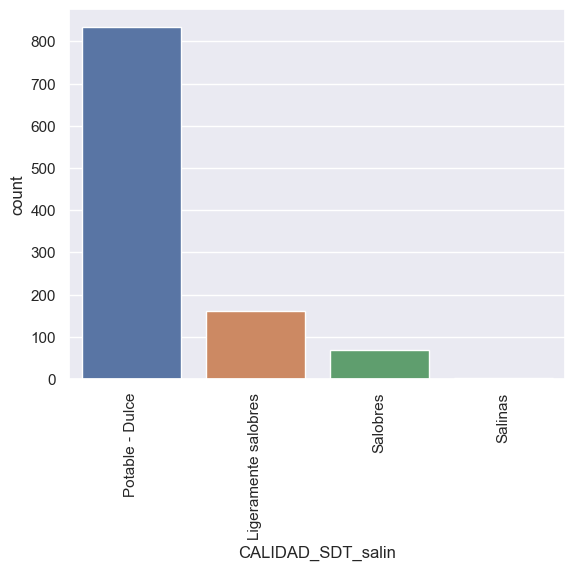

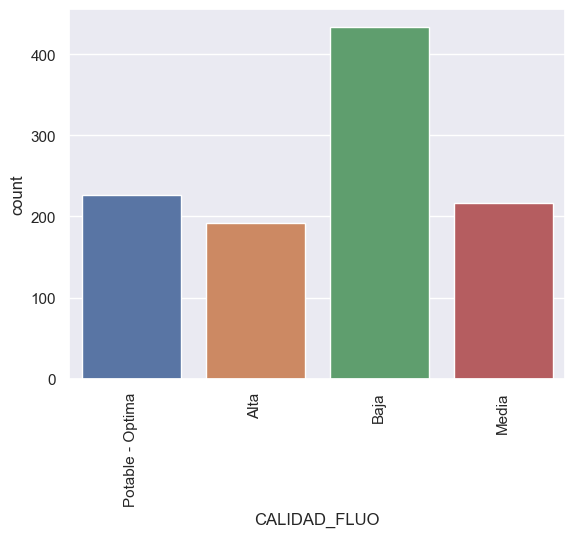

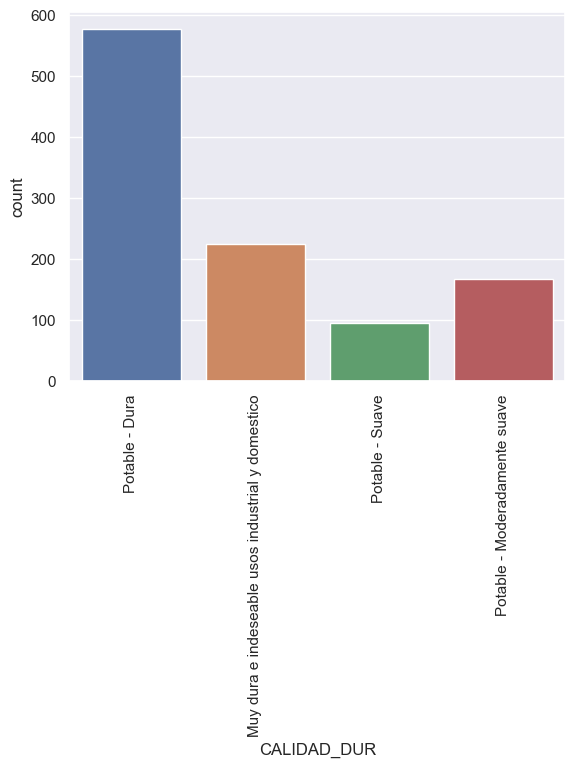

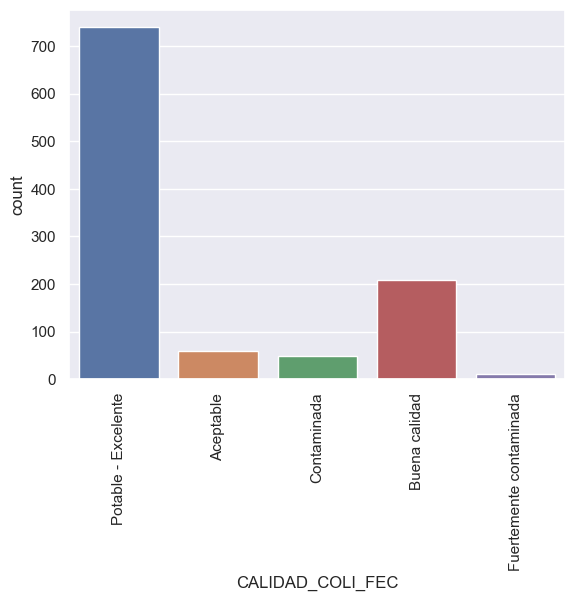

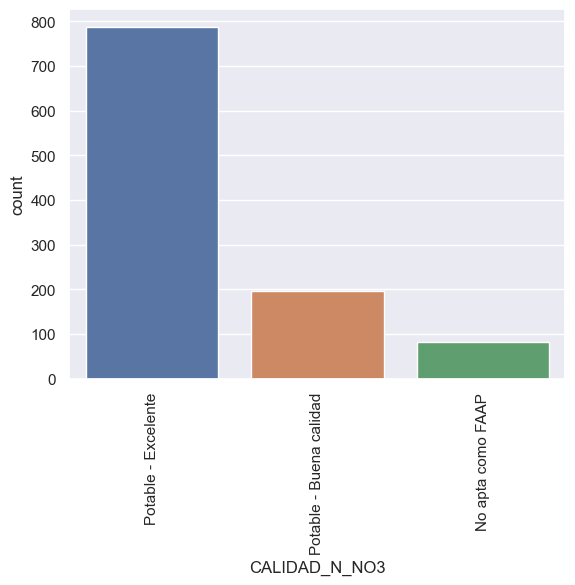

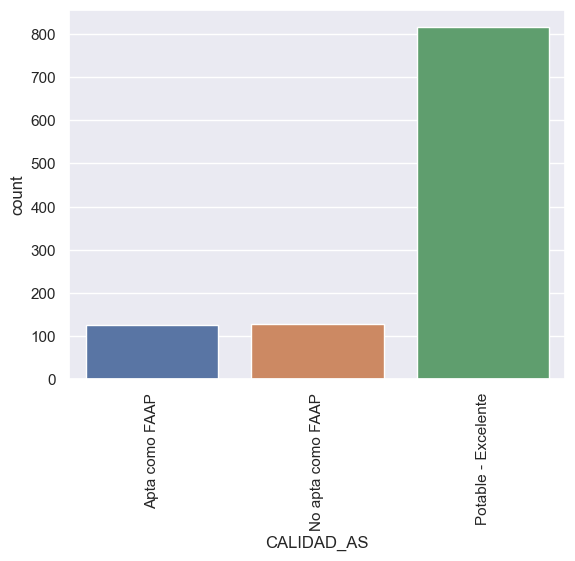

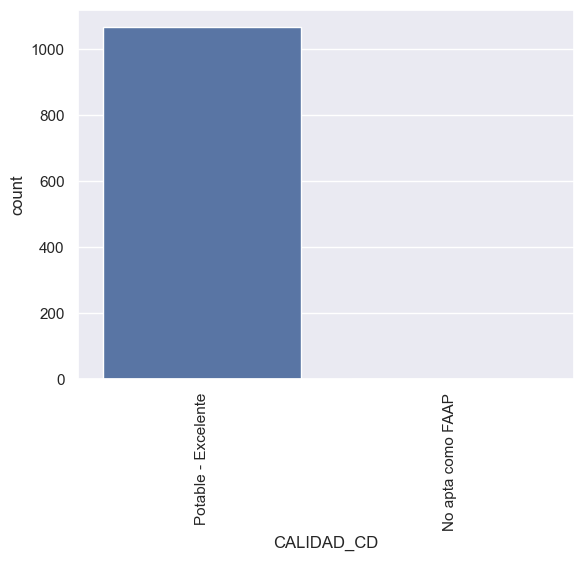

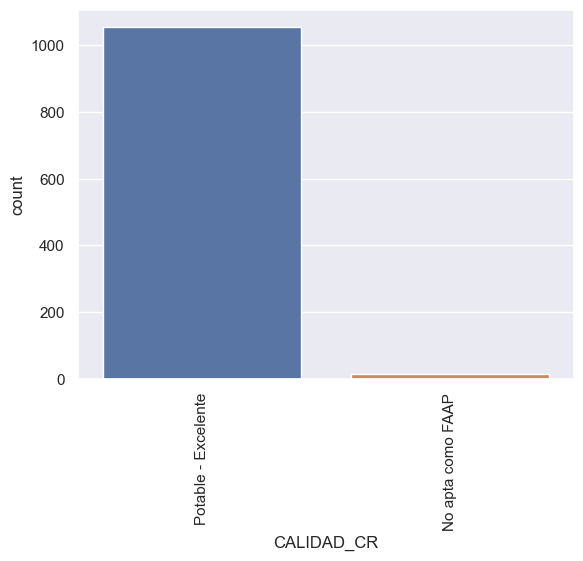

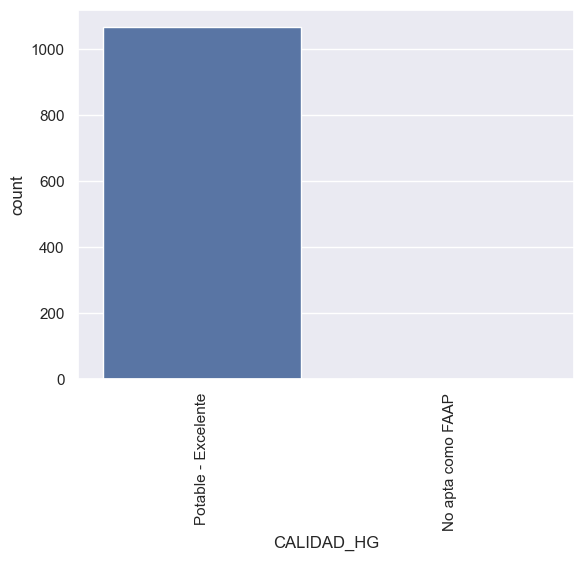

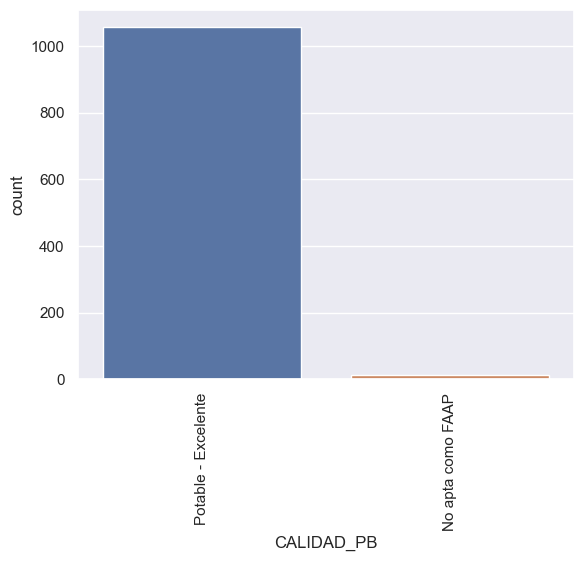

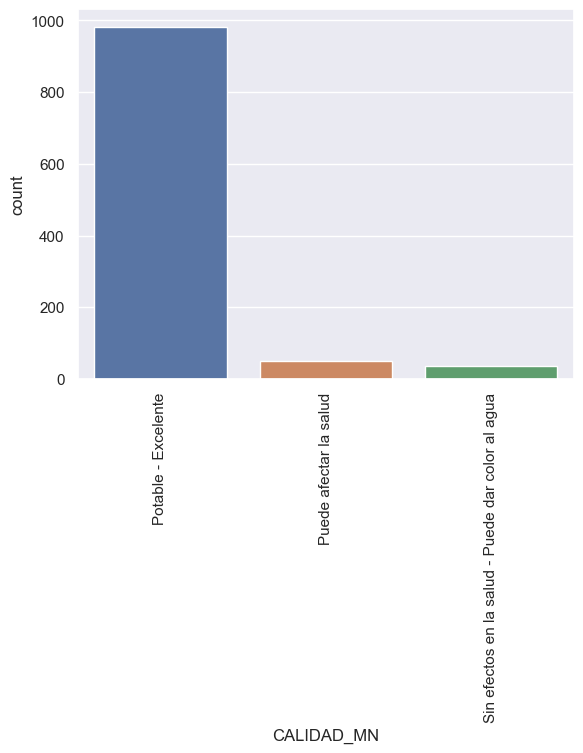

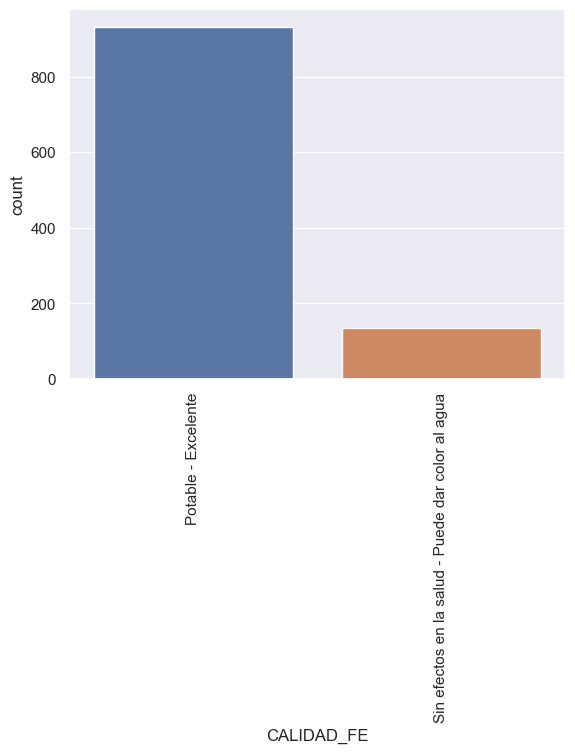

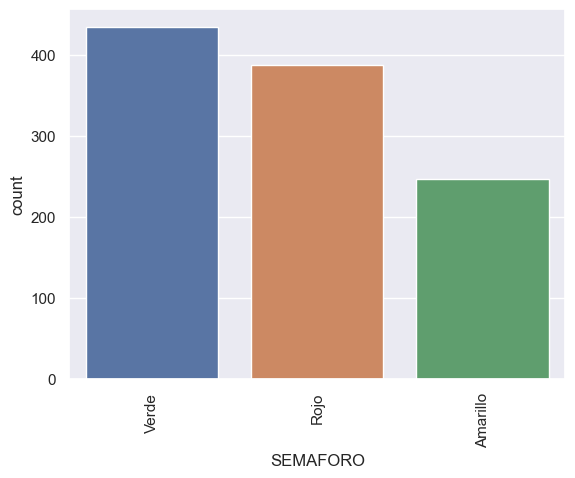

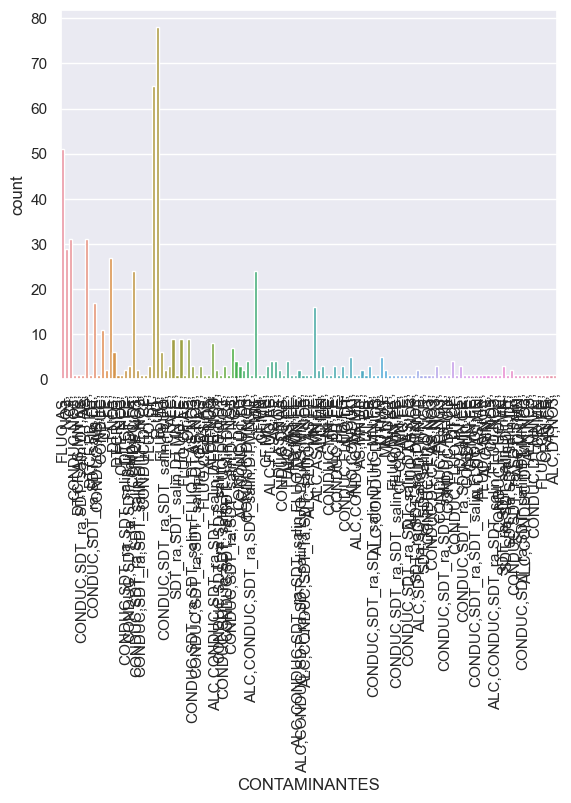

In [13]:
for col in subterraneas_col_calidad:
    sns.countplot(x= df_subterraneas[col])
    # plt.figure(figsize=(10,10))
    plt.xticks(rotation= 90)
    plt.show()

La otra variable que tiene muchos valores en NaN es contaminantes pero como podemos ver es una variable la cual aunque tiene muchos valores distinto tendremos que ver si es que su densidad es mucha para ese valor y tomar la decisión correcta al imputar.

In [15]:
pd.DataFrame(df_subterraneas['CONTAMINANTES'].value_counts(normalize=True))

,CONTAMINANTES
"FLUO,",0.123028
"DT,",0.102524
"FLUO,AS,",0.080442
"CF,",0.048896
"AS,",0.048896
...,...
"ALC,CONDUC,SDT_ra,SDT_salin,DT,NO3,",0.001577
"ALC,CONDUC,SDT_ra,SDT_salin,FLUO,DT,AS,MN,FE,",0.001577
"PB,MN,FE,",0.001577
"ALC,AS,FE,",0.001577


Primero podemos ver con esto que cuando hay más de un contaminante en la observación este es separado por comas por lo que primero tendríamos que limpiar esa columna para seguir con el trabajo de imputación

In [22]:
df_subterraneas['CONTAMINANTES'].str.split(',', expand=True)

,0,1,2,3,4,5,6,7,8,9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FLUO,AS,,None,None,None,None,None,None,None
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NO3,,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
1063,CONDUC,DT,NO3,,None,None,None,None,None,None
1064,NO3,,None,None,None,None,None,None,None,None
1065,CONDUC,DT,NO3,,None,None,None,None,None,None
1066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Se puede ver que por categoría hay una clara tendencia a estar centrado en una sola parte por lo que es necesario tener en cuenta esto para su imputación categórica.

In [11]:
df_superficiales.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,LATITUD,PERIODO,DBO_mg/L,CALIDAD_DBO,DQO_mg/L,CALIDAD_DQO,SST_mg/L,CALIDAD_SST,COLI_FEC_NMP_100mL,CALIDAD_COLI_FEC,E_COLI_NMP_100mL,CALIDAD_E_COLI,ENTEROC_NMP_100mL,CALIDAD_ENTEROC,OD_PORC,CALIDAD_OD_PORC,OD_PORC_SUP,CALIDAD_OD_PORC_SUP,OD_PORC_MED,CALIDAD_OD_PORC_MED,OD_PORC_FON,CALIDAD_OD_PORC_FON,TOX_D_48_UT,CALIDAD_TOX_D_48,TOX_V_15_UT,CALIDAD_TOX_V_15,TOX_D_48_SUP_UT,CALIDAD TOX_D_48_SUP,TOX_D_48_FON_UT,CALIDAD_TOX_D_48_FON,TOX_FIS_SUP_15_UT,CALIDAD_TOX_FIS_SUP_15,TOX_FIS_FON_15_UT,CALIDAD_TOX_FIS_FON_15,SEMAFORO,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
0,DLAGU8,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,22.24730,2020.0,6,Buena calidad,54.08,Contaminada,13.75,Excelente,1162,Contaminada,98,Excelente,NaN,NaN,NaN,NaN,46.8,Aceptable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,<1,No Toxico,NaN,NaN,Rojo,"DQO,CF,",SI,NO,SI,NO,SI,ND,SI,SI,LENTICO
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,22.90473,2020.0,NaN,NaN,NaN,NaN,<10,Excelente,NaN,NaN,NaN,NaN,20,Excelente,NaN,NaN,92,Excelente,95.4,Excelente,92.2,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,22.89880,2020.0,NaN,NaN,NaN,NaN,<10,Excelente,NaN,NaN,NaN,NaN,<3,Excelente,NaN,NaN,92,Excelente,95.4,Excelente,92.2,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
3,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,22.89609,2020.0,NaN,NaN,NaN,NaN,13.9667,Excelente,NaN,NaN,NaN,NaN,<3,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,86.7,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
4,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,22.87694,2020.0,NaN,NaN,NaN,NaN,<10,Excelente,NaN,NaN,NaN,NaN,30,Excelente,NaN,NaN,96.2,Excelente,95.9,Excelente,95.5,Excelente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1,No Toxico,NaN,NaN,Verde,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO


In [12]:
df_superficiales.describe(include= 'all')

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,LATITUD,PERIODO,DBO_mg/L,CALIDAD_DBO,DQO_mg/L,CALIDAD_DQO,SST_mg/L,CALIDAD_SST,COLI_FEC_NMP_100mL,CALIDAD_COLI_FEC,E_COLI_NMP_100mL,CALIDAD_E_COLI,ENTEROC_NMP_100mL,CALIDAD_ENTEROC,OD_PORC,CALIDAD_OD_PORC,OD_PORC_SUP,CALIDAD_OD_PORC_SUP,OD_PORC_MED,CALIDAD_OD_PORC_MED,OD_PORC_FON,CALIDAD_OD_PORC_FON,TOX_D_48_UT,CALIDAD_TOX_D_48,TOX_V_15_UT,CALIDAD_TOX_V_15,TOX_D_48_SUP_UT,CALIDAD TOX_D_48_SUP,TOX_D_48_FON_UT,CALIDAD_TOX_D_48_FON,TOX_FIS_SUP_15_UT,CALIDAD_TOX_FIS_SUP_15,TOX_FIS_FON_15_UT,CALIDAD_TOX_FIS_FON_15,SEMAFORO,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
count,3493,3493,3493,3493,3493,3492,3479,3493,3479,3493.000000,3493.000000,3493.0,2581,2581,2581,2581,3489,3489,2582,2582,2582,2582,904,904,1797,1797,1619,1619,487,487,946,946,1816,1816,1819,1819,762,762,0.0,0.0,1674,1674,0.0,0.0,3493,2226,3493,3493,3493,3493,3493,3493,3493,3493,3493
unique,3493,3481,13,32,755,521,1067,23,27,NaN,NaN,NaN,743,5,1211,5,1219,5,408,5,372,5,185,4,837,5,771,5,359,5,556,5,85,4,148,4,23,4,NaN,NaN,17,4,NaN,NaN,3,96,3,3,3,3,3,3,3,2,3
top,DLAGU8,ANTES DE LA CONFLUENCIA CON EL RIO ATOYAC,LERMA SANTIAGO PACIFICO,VERACRUZ DE IGNACIO DE LA LLAVE,ACAPULCO DE JUAREZ,YUCATAN (RESTO DE RH 32),OCEANO PACIFICO,LOTICO,RIO,NaN,NaN,NaN,<2,Excelente,<10,Contaminada,<10,Excelente,24000,Fuertemente contaminada,<3,Fuertemente contaminada,<3,Excelente,<10,Excelente,<10,Excelente,<10,Excelente,<10,Excelente,<1,No Toxico,<1,No Toxico,<1,No Toxico,NaN,NaN,<1,No Toxico,NaN,NaN,Verde,"CF,E_COLI,",SI,SI,SI,NO,SI,ND,SI,SI,LOTICO
freq,1,3,709,326,60,101,139,1263,1478,NaN,NaN,NaN,1224,1330,559,790,880,1780,360,891,365,1054,464,709,110,769,15,853,14,236,35,409,1729,1729,1671,1671,738,738,NaN,NaN,1657,1657,NaN,NaN,1267,439,2319,1650,3104,1634,1453,2589,2958,3411,1772
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-100.359969,21.046992,2020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.122773,3.893696,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-117.124030,14.534910,2020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-103.882310,18.396070,2020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-99.795530,20.148980,2020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-96.860230,22.828930,2020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
